# **AIMS | Monte Carlo Methods for Machine Learning**

# **Problems for week 3:Optimization**

Student: Astride Melvin Fokam Ninyim

Last updated Date: 22 Nov 2025

Python 3

Reference:
-  https://www.geeksforgeeks.org/engineering-mathematics/random-variable/

- https://www.geeksforgeeks.org/maths/histogram/

- https://www.geeksforgeeks.org/dsa/estimating-value-pi-using-monte-carlo/

- https://www.geeksforgeeks.org/artificial-intelligence/markov-chain-monte-carlo-mcmc/

- https://appliedmaths.sun.ac.za/~htouchette/aims/gaussmcmc1.pdf

- course work(1 and 2)

- course notes

- https://youtu.be/3qodjHRUxAo

- https://youtu.be/18Sh8Uh8pAg

# **Theoretical**

### Q1. **Gradient diffusions.**. 


Consider the SDE in $\mathbb{R}^d$ defined by
$$ dX_t = -\nabla U(X_t)dt + \sigma dW_t $$
where $U(x)$ is a smooth convex potential with a unique minimum at $x^*$.

#### **(a) Long-time behavior without noise ($\sigma = 0$)**

When we set $\sigma = 0$, the stochastic term vanishes, and the SDE becomes the deterministic Ordinary Differential Equation (ODE):
$$ \frac{dx(t)}{dt} = -\nabla U(x(t)) $$
This is the **Gradient Descent flow**. To find the long-time behavior, we analyze the time evolution of the potential $U(x(t))$ itself.

**Proof of convergence:**
Let us compute the time derivative of the potential along the trajectory of the system using the chain rule:

$$ \frac{d}{dt} U(x(t)) = \nabla U(x(t)) \cdot \frac{dx(t)}{dt} $$

Substitute $\frac{dx}{dt} = -\nabla U(x)$:

$$ \frac{d}{dt} U(x(t)) = \nabla U(x(t)) \cdot (-\nabla U(x(t))) $$
$$ \frac{d}{dt} U(x(t)) = - \| \nabla U(x(t)) \|^2 $$

Since the squared norm $\| \nabla U(x) \|^2 \geq 0$, we have:
$$ \frac{d}{dt} U(x(t)) \leq 0 $$

This implies that the potential energy $U(x(t))$ is strictly decreasing along the trajectory, except at points where $\nabla U(x) = 0$ (critical points).
Since $U(x)$ is assumed to be **convex** with a **unique minimum** at $x^*$, the only point where $\nabla U(x) = 0$ is $x^*$.

**Conclusion:**
As $t \to \infty$, the system settles at the state of minimum energy. The trajectory $X_t$ converges asymptotically to the global minimum:
$$ \lim_{t \to \infty} X_t = x^* $$




#### **(b) Stationary distribution and limit as $\sigma \to 0$**

The stationary distribution is given by:
$$ p^*(x) = c \cdot e^{-2U(x)/\sigma^2} $$

**Proof that $p^*(x)$ is the stationary distribution:**
The time evolution of the probability density $p(x, t)$ for the SDE $dX_t = f(X_t)dt + \sigma dW_t$ (where $f(x) = -\nabla U(x)$) is governed by the **Fokker-Planck equation** :



$$ \frac{\partial p}{\partial t} = -\nabla \cdot (f(x) p) + \frac{\sigma^2}{2} \Delta p $$

Substituting $f(x) = -\nabla U(x)$:
$$ \frac{\partial p}{\partial t} = \nabla \cdot (\nabla U(x) p) + \frac{\sigma^2}{2} \nabla \cdot (\nabla p) $$

For $p^*(x)$ to be a stationary distribution, we must have $\frac{\partial p^*}{\partial t} = 0$. Let's calculate the flux terms.
First, verify the gradient of the proposed solution $p^*(x) = c e^{-2U(x)/\sigma^2}$:

$$ \nabla p^*(x) = c e^{-2U(x)/\sigma^2} \cdot \nabla \left( \frac{-2U(x)}{\sigma^2} \right)  $$
$$ \nabla p^*(x) =  p^*(x) \cdot \left( -\frac{2}{\sigma^2} \nabla U(x) \right) $$



Then we have:
$$ \frac{\sigma^2}{2} \nabla p^*(x) = - p^*(x) \nabla U(x) $$
$$ \nabla U(x) p^*(x) + \frac{\sigma^2}{2} \nabla p^*(x) = 0 $$

Taking the divergence of both sides :
$$ \nabla \cdot \left( \nabla U p^* + \frac{\sigma^2}{2} \nabla p^* \right) = \nabla \cdot (0) = 0 $$

Thus, $\frac{\partial p^*}{\partial t} = 0$, proving that $p^*(x)$ is indeed the invariant distribution.

**Discussion of Shape:**
Since $U(x)$ has a unique global minimum at $x^*$, the exponent $-2U(x)/\sigma^2$ has a unique global maximum at $x^*$. Consequently:
1.  **Mode:** The distribution $p^*(x)$ has its peak (mode) exactly at $x^*$.
2.  **Shape:** It resembles a Gaussian distribution centered at $x^*$. The potential $U(x)$ determines the "depth" of the well, while $\sigma$ determines the "width" of the spread.

**Limit as $\sigma \to 0$:**
The parameter $\sigma$ acts like a temperature factor in statistical mechanics.
*   As $\sigma \to 0$, the term $2/\sigma^2 \to \infty$.
*   Any $x$ where $U(x) > U(x^*)$ will have a probability density exponentially smaller than at $x^*$.
*   The distribution becomes infinitely sharp and concentrates all its probability mass at the minimum.

Mathematically, $p^*(x)$ converges to a **Dirac delta function**:
$$ \lim_{\sigma \to 0} p^*(x) = \delta(x - x^*) $$

# **Numerical**

In [20]:
#import the requirements librairies 
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import random
from ipywidgets import interact, FloatSlider, IntSlider
import ipywidgets as widgets
import networkx as nx
import numpy as np
from scipy.optimize import minimize_scalar
from scipy import optimize
 # Set plot style\n"
plt.style.use('seaborn-v0_8-whitegrid')
from ipywidgets import interact, FloatSlider, IntSlider
from matplotlib.lines import Line2D  

### Q2. **Stochastic gradient descent.**. 

We are optimizing the potential:
$$ U(x) = \frac{x^4}{2} - 5x^2 + x $$
The gradient (derivative) is:
$$ U'(x) = 2x^3 - 10x + 1 $$


### **1. Definition of  the Potential and Gradient function**

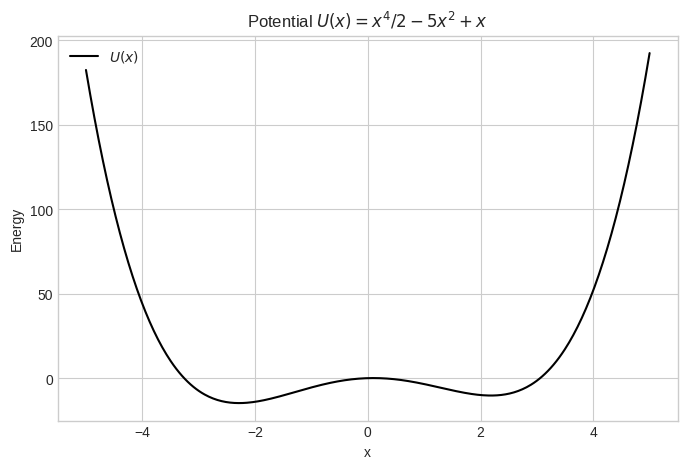

In [21]:
# Define the potential U(x)
def U(x):
    return (x**4)/2 - 5*(x**2) + x

# Define the gradient U'(x) 
def dU(x):
    return 2*x**3 - 10*x + 1

# Visualization of the potential
x_grid = np.linspace(-5, 5, 400)
plt.figure(figsize=(8, 5))
plt.plot(x_grid, U(x_grid), 'k-', label=r'$U(x)$')
plt.title(r"Potential $U(x) = x^4/2 - 5x^2 + x$")
plt.xlabel("x")
plt.ylabel("Energy")
plt.grid(True)
plt.legend()
plt.show()


### **Q2(a). Find Local and Global Minima**

We need to find the roots of $U'(x) = 0$ or minimize $U(x)$ numerically.

In [22]:
# We search in two regions based on the plot: around -3 and around +3

res_global = minimize_scalar(U, bounds=(-4, -2), method='bounded')
res_local = minimize_scalar(U, bounds=(2, 4), method='bounded')

x_global = res_global.x
x_local = res_local.x

print(f"Global Minimum found at x ≈ {x_global:.4f}, U(x) ≈ {U(x_global):.4f}")
print(f"Local Minimum found at  x ≈ {x_local:.4f}, U(x) ≈ {U(x_local):.4f}")

# Also find the local maximum (saddle point) between the two minima
# We minimize -U(x) or find root near 0
res_saddle = minimize_scalar(lambda x: -U(x), bounds=(-1, 1), method='bounded')
print(f"Local Maximum  at x ≈ {res_saddle.x:.4f}, U(x) ≈ {-res_saddle.fun:.4f}")



Global Minimum found at x ≈ -2.2845, U(x) ≈ -14.7605
Local Minimum found at  x ≈ 2.1843, U(x) ≈ -10.2895
Local Maximum  at x ≈ 0.1002, U(x) ≈ 0.0501


### **Q2(b). Deterministic Gradient Descent**

We solve the ODE $\dot{x}(t) = -U'(x(t))$ using Euler discretization:
$$ x_{n+1} = x_n - U'(x_n) \Delta t $$


In [23]:
#Define the ODE solver using Euler's method
def solve_ode(x0, dt, T):
    n_steps = int(T / dt)
    t = np.linspace(0, T, n_steps)
    x = np.zeros(n_steps)
    x[0] = x0
    
    for i in range(n_steps - 1):
        # Euler update: x_new = x_old - grad * dt
        x[i+1] = x[i] - dU(x[i]) * dt
    return t, x

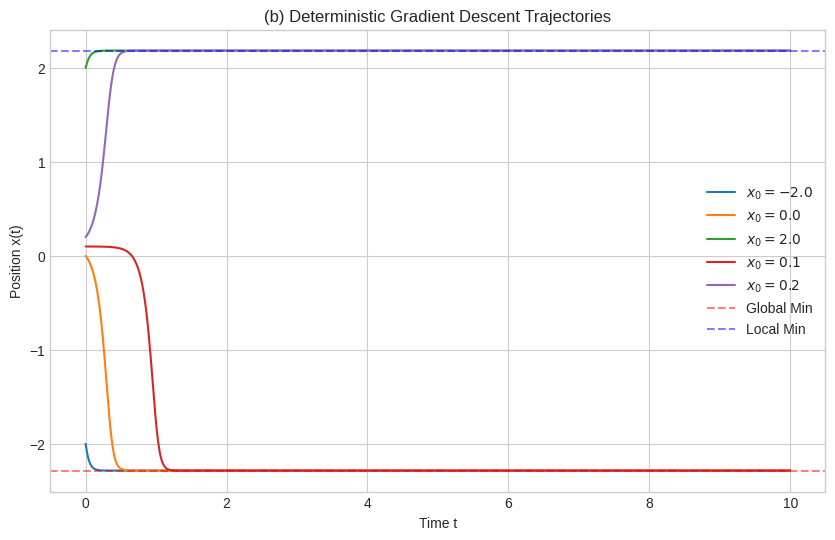

In [24]:
# --- 1-selected Parameters ---
initial_conditions = [-2.0, 0.0, 2.0, 0.1,0.2]
dt_fixed = 0.01
T_fixed = 10.0

plt.figure(figsize=(10, 6))
for x0 in initial_conditions:
    t, x_traj = solve_ode(x0, dt_fixed, T_fixed)
    plt.plot(t, x_traj, label=f'$x_0={x0}$')


plt.axhline(x_global, color='r', linestyle='--', alpha=0.5, label='Global Min')
plt.axhline(x_local, color='b', linestyle='--', alpha=0.5, label='Local Min')

plt.title("(b) Deterministic Gradient Descent Trajectories")
plt.xlabel("Time t")
plt.ylabel("Position x(t)")
plt.legend()
plt.grid(True)
plt.show()


**Analysis:**
In this scenario, the particle's fate is determined by its position relative to the potential barrier (the local maximum), which is located at **$x \approx 0.1002$**.

*   **Left Basin ($x < 0.1002$):** Any particle starting to the left of the barrier rolls down to the **Global Minimum** ($x \approx -2.2845$).
    *   This is why the trajectories for **$x_0 = -2.0$** and **$x_0 = 0.0$** converge to the bottom line.
    *   Crucially, **$x_0 = 0.1$** also falls into this basin. Since $0.1 < 0.1002$, it starts just barely on the left slope of the hill. Because the system is deterministic, it strictly follows the gradient down to the global minimum.

*   **Right Basin ($x > 0.1002$):** Any particle starting to the right of the barrier rolls into the **Local Minimum** ($x \approx 2.1843$).
    *   This is observed for **$x_0 = 0.2$** and **$x_0 = 2.0$**, which is trapped in the shallower well and cannot cross back over the barrier to reach the global minimum.

**Conclusion:** The dividing line is exactly $x \approx 0.1002$. Even a tiny deviation near this point (like starting at 0.1) determines the outcome entirely, but without noise, the particle cannot switch basins once it starts moving.

Simulation Parameters (Randomized):
dt (Step Size): 0.0172
T (Duration):   5.00
Trajectories:   8


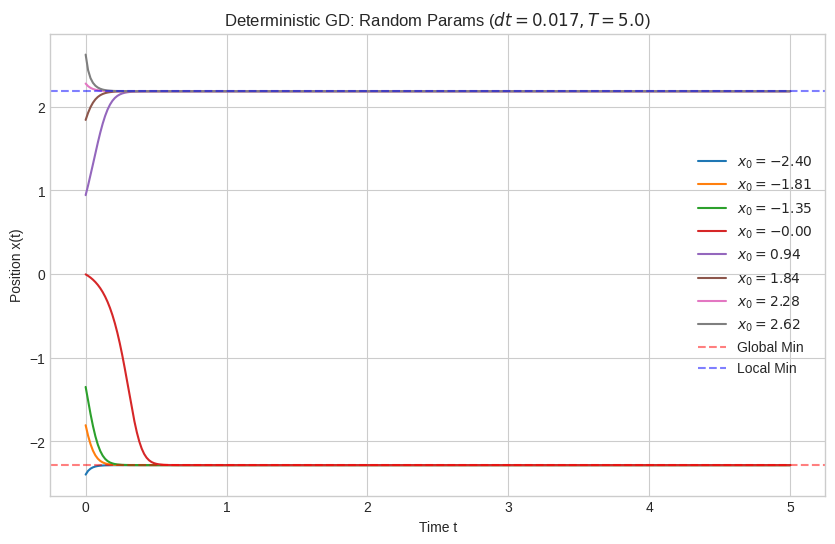

In [25]:
# --- 2. Randomized Parameters ---

# Random Step Size (dt) between 0.001 and 0.05  
dt_random = np.random.uniform(0.001, 0.05)

# Random Total Time (T) between 5.0 and 20.0
T_random = np.random.uniform(5.0, 20.0)

# Random Number of trajectories to plot (between 3 and 10)
num_trajectories = np.random.randint(3, 11)


plt.figure(figsize=(10, 6))

print(f"Simulation Parameters (Randomized):")
print(f"dt (Step Size): {dt_random:.4f}")
print(f"T (Duration):   {T_random:.2f}")
print(f"Trajectories:   {num_trajectories}")

# Generate random initial conditions based on the random count
x0_list = np.random.uniform(-2.5, 3.0, num_trajectories)

for x0 in sorted(x0_list):
    t, x_traj = solve_ode(x0, dt_random, T_random)
    plt.plot(t, x_traj, label=f'$x_0={x0:.2f}$')

# Reference lines
plt.axhline(x_global, color='r', linestyle='--', alpha=0.5, label='Global Min')
plt.axhline(x_local, color='b', linestyle='--', alpha=0.5, label='Local Min')

plt.title(f"Deterministic GD: Random Params ($dt={dt_random:.3f}, T={T_random:.1f}$)")
plt.xlabel("Time t")
plt.ylabel("Position x(t)")
plt.legend()
plt.grid(True)
plt.show()

In [26]:
x_global_min = -2.2845  
x_local_min = 2.1843 
x_barrier = 0.1002     

# --- 3. Interactive Function ---
def plot_system_with_table(dt, T, seed):
    np.random.seed(seed)
    
    # Generate random initial conditions
    num_trajectories = 5
    
    x0_list = np.random.uniform(-4.0, 4.0, num_trajectories)
    x0_list.sort()
    
    data = []
    
    
    fig, (ax_pot, ax_traj) = plt.subplots(1, 2, figsize=(16, 6))
    

    x_grid = np.linspace(-4.5, 4.5, 400)
    ax_pot.plot(x_grid, U(x_grid), 'k-', lw=2, alpha=0.6) 
    ax_pot.set_title("Potential Landscape U(x) = $x^4/2 - 5x^2 + x$")
    ax_pot.set_xlabel("Position x")
    ax_pot.set_ylabel("Energy U")
    ax_pot.grid(True)
    ax_pot.set_ylim(-35, 10) 
    ax_pot.set_xlim(-4.5, 4.5)
    
    
    ax_traj.set_title(f"Trajectories (dt={dt}, T={T})")
    ax_traj.set_xlabel("Time t")
    ax_traj.set_ylabel("Position x(t)")
    ax_traj.grid(True)
    ax_traj.set_ylim(-4.5, 4.5)
    
    
    ax_traj.axhline(x_global_min, color='r', linestyle='--', alpha=0.3, label='Global Min (-3.21)')
    ax_traj.axhline(x_local_min, color='b', linestyle='--', alpha=0.3, label='Local Min (3.11)')

    colors = plt.cm.jet(np.linspace(0, 1, num_trajectories))
    
    
    for i, x0 in enumerate(x0_list):
        t, x_path = solve_ode(x0, dt, T)
        c = colors[i]
        
        x_final = x_path[-1]
        u_final = U(x_final)
        
        
        if abs(x_final - x_global_min) < 0.5:
            basin = "Global Min"
        elif abs(x_final - x_local_min) < 0.5:
            basin = "Local Min"
        elif x_final > 4.5 or x_final < -4.5:
            basin = "Diverged"
        else:
            basin = "Saddle/Unstable"

        
        ax_traj.plot(t, x_path, color=c, label=f'$x_0={x0:.2f}$')
        
        
        # Circle (o) = Star
        ax_pot.scatter(x0, U(x0), color=c, s=100, edgecolors='black', zorder=5)
        # Cross (x) = End
        ax_pot.scatter(x_final, u_final, color=c, marker='x', s=80, linewidths=3, zorder=5)
        
        data.append({
            "Initial Pos (x0)": x0,
            "Final Pos (x_T)": x_final,
            "Final Energy (U)": u_final,
            "Basin": basin
        })

    
    legend_elements = [
        Line2D([0], [0], color='black', lw=2, label='Potential U(x)'),
        Line2D([0], [0], marker='o', color='w', markerfacecolor='gray', markersize=10, label='Start Point'),
        Line2D([0], [0], marker='x', color='gray', linestyle='None', markersize=10, markeredgewidth=2, label='End Point')
    ]
    ax_pot.legend(handles=legend_elements, loc='upper center')
    
    
    ax_traj.legend(loc='upper right', fontsize=9)
    
    plt.show()
    
    
    df = pd.DataFrame(data)
    styled_df = df.style.format({
        "Initial Pos (x0)": "{:.4f}",
        "Final Pos (x_T)": "{:.4f}",
        "Final Energy (U)": "{:.4f}"
    }).background_gradient(subset=["Final Energy (U)"], cmap="coolwarm_r") \
      .set_caption("<b>Simulation Statistics</b>")
    
    display(styled_df)

#
interact(plot_system_with_table, 
         dt=FloatSlider(value=0.01, min=0.001, max=0.1, step=0.001, description='Step (dt)'),
         T=IntSlider(value=10, min=5, max=30, step=1, description='Time (T)'),
         seed=IntSlider(value=42, min=1, max=100, step=1, description='Rand Seed')
);

interactive(children=(FloatSlider(value=0.01, description='Step (dt)', max=0.1, min=0.001, step=0.001), IntSli…


**Analysis:**
With all the result I gut for this simulation i can say this :  the particle's fate is determined by its position relative to the potential barrier (the local maximum), which is located at **$x \approx 0.1002$**.

*   **Left Basin ($x < 0.1002$):** Any particle starting to the left of the barrier rolls down to the **Global Minimum** ($x \approx -2.2845$).
    

*   **Right Basin ($x > 0.1002$):** Any particle starting to the right of the barrier rolls into the **Local Minimum** ($x \approx 2.1843 $).

**Conclusion:** The dividing line is exactly $x \approx 0.1002$. Even a tiny deviation near this point (like starting at 0.1) determines the outcome entirely, but without noise, the particle cannot switch basins once it starts moving.

### **Q2(c). Stochastic Gradient Descent (SGD)**

We solve the SDE using the Euler-Maruyama scheme:
$$ X_{n+1} = X_n - U'(X_n)\Delta t + \sigma \sqrt{\Delta t} \xi_n, \quad \xi_n \sim \mathcal{N}(0,1) $$



In [27]:
# --- 2. Stochastic Gradient Descent (SDE) ---
def solve_sde(x0, sigma, dt=0.01, T=100):
    n_steps = int(T / dt)
    t = np.linspace(0, T, n_steps)
    x = np.zeros(n_steps)
    x[0] = x0
    
    for i in range(n_steps - 1):
        # Generate random noise (Gaussian)
        xi = np.random.normal(0, 1)
        
        # Euler-Maruyama update
        drift = -dU(x[i]) * dt
        diffusion = sigma * np.sqrt(dt) * xi
        
        x[i+1] = x[i] + drift + diffusion
    return t, x


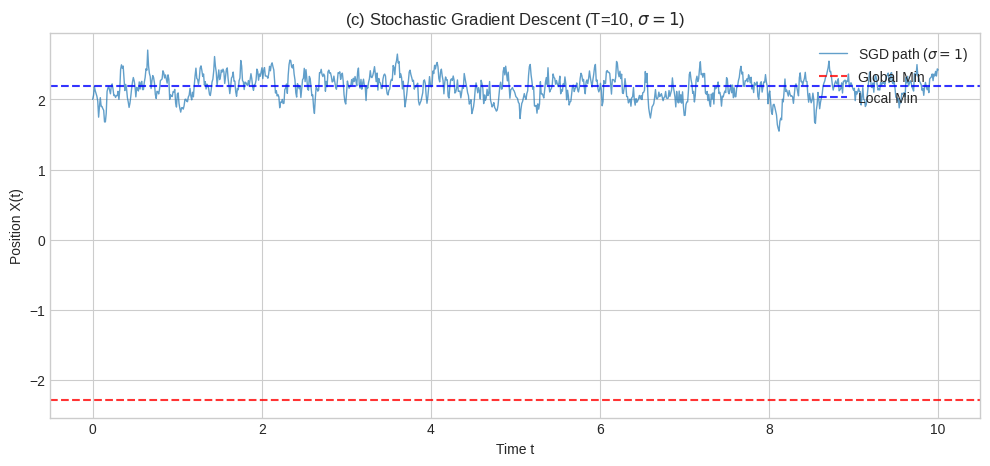

In [28]:
x_global = -2.2845  
x_local = 2.1843 

# --- 3. Simulation Parameters ---
T_sim = 10
sigma_sim = 1
x0_sim = 2.0  


t_sde, x_sde = solve_sde(x0_sim, sigma=sigma_sim, T=T_sim)


plt.figure(figsize=(12, 5))
plt.plot(t_sde, x_sde, alpha=0.7, lw=1, label=f'SGD path ($\\sigma={sigma_sim}$)')

# Reference lines
plt.axhline(x_global, color='r', linestyle='--', alpha=0.8, label='Global Min')
plt.axhline(x_local, color='b', linestyle='--', alpha=0.8, label='Local Min')

plt.title(f"(c) Stochastic Gradient Descent (T={T_sim}, $\\sigma={sigma_sim}$)")

plt.xlabel("Time t")
plt.ylabel("Position X(t)")
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

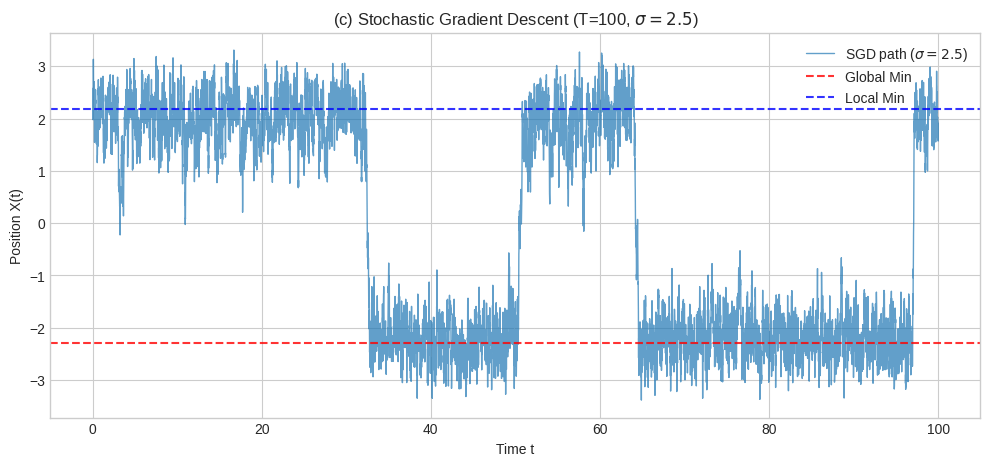

In [29]:
x_global = -2.2845  
x_local = 2.1843 

# --- 3. Simulation Parameters ---
T_sim = 100
sigma_sim = 2.5
x0_sim = 2.0  

# Run simulation
t_sde, x_sde = solve_sde(x0_sim, sigma=sigma_sim, T=T_sim)

# --- 4. Plotting (Corrections Applied Here) ---
plt.figure(figsize=(12, 5))

# FIX 1: Use double backslash \\sigma inside the f-string
plt.plot(t_sde, x_sde, alpha=0.7, lw=1, label=f'SGD path ($\\sigma={sigma_sim}$)')

# Reference lines
plt.axhline(x_global, color='r', linestyle='--', alpha=0.8, label='Global Min')
plt.axhline(x_local, color='b', linestyle='--', alpha=0.8, label='Local Min')

# FIX 2: Use double backslash \\sigma inside the title f-string
plt.title(f"(c) Stochastic Gradient Descent (T={T_sim}, $\\sigma={sigma_sim}$)")

plt.xlabel("Time t")
plt.ylabel("Position X(t)")
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


**Analysis:**
This simulation illustrates **successful barrier crossing** and the ability of Stochastic Gradient Descent (SGD) to escape local minima when the noise level ($\sigma$) is sufficiently high.

1.  **Transitions Between Basins:** Unlike the previous case, the particle does **not** get trapped in the initial basin. It starts at the Local Minimum (blue line), but at **$t \approx 25$**, the accumulated noise is strong enough to push it over the barrier, causing it to fall into the Global Minimum (red line).

2.  **Continuous Exploration (Hopping):** The system exhibits "hopping" behavior. It does not just find the Global Minimum and stay there; the noise continues to kick it out. We see transitions back to the Local Minimum at **$t \approx 40$** and **$t \approx 80$**, and returns to the Global Minimum at **$t \approx 42$** and **$t \approx 98$**.

3.  **Overcoming the Barrier:** The noise level ($\sigma = 2.5$) is high relative to the barrier height. This means the "thermal kicks" are strong enough to frequently overcome the energy threshold separating the two wells. The particle effectively samples the entire landscape rather than settling in one spot.

**Conclusion:** The system successfully finds the Global Minimum (the deeper well), proving that SGD can escape suboptimal solutions. However, because the noise parameter ($\sigma$) is kept constant and high, the particle cannot "settle" or converge strictly to the bottom; it remains in a state of dynamic equilibrium, constantly switching between the two stable states.


### **Q2(d). Simulated Annealing**

We repeat the SDE simulation but decrease noise over time: $\sigma_t = \frac{\alpha}{\sqrt{t+1}}$.
$$ X_{n+1} = X_n - U'(X_n)\Delta t + \frac{\alpha}{\sqrt{t+1}} \sqrt{\Delta t} \xi_n $$

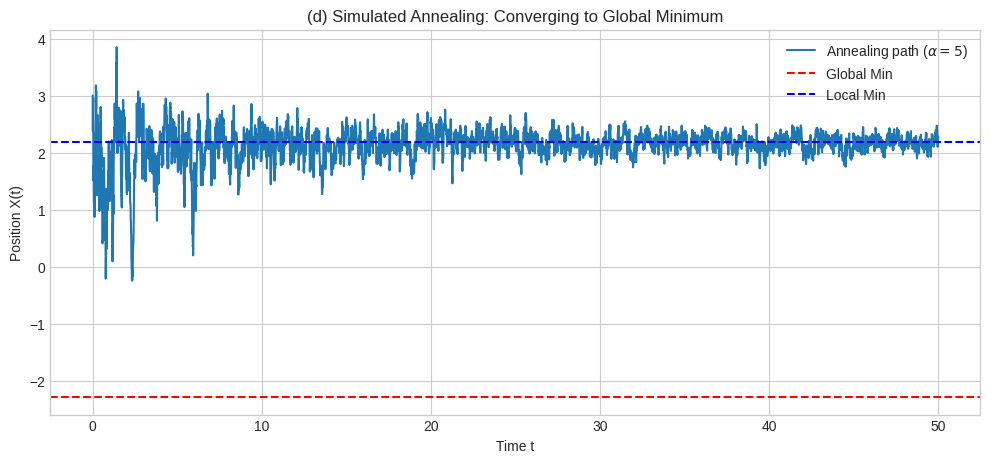

In [30]:
def solve_annealing(x0, alpha, dt=0.01, T=50):
    n_steps = int(T / dt)
    t = np.linspace(0, T, n_steps)
    x = np.zeros(n_steps)
    x[0] = x0
    
    for i in range(n_steps - 1):
        # Annealing schedule
        current_time = i * dt
        sigma_t = alpha / np.sqrt(current_time + 1)
        
        xi = np.random.normal(0, 1)
        drift = -dU(x[i]) * dt
        diffusion = sigma_t * np.sqrt(dt) * xi
        
        x[i+1] = x[i] + drift + diffusion
    return t, x

# Parameters
alpha_ann = 4.9
T_ann = 50
x0_ann = 3.0 # Start far in the local basin

t_ann, x_ann = solve_annealing(x0_ann, alpha=alpha_ann, T=T_ann)

plt.figure(figsize=(12, 5))
plt.plot(t_ann, x_ann, label=r'Annealing path ($\alpha=5$)')
plt.axhline(x_global, color='r', linestyle='--', label='Global Min')
plt.axhline(x_local, color='b', linestyle='--', label='Local Min')
plt.title("(d) Simulated Annealing: Converging to Global Minimum")
plt.xlabel("Time t")
plt.ylabel("Position X(t)")
plt.legend()
plt.grid(True)
plt.show()



**Analysis:** Initially, the noise is high, allowing the particle to explore and jump out of the local well. As time progresses, the noise decreases ("cooling"), settling the particle into the deepest basin of attraction (the global minimum) and reducing fluctuations until it converges.




### **Q2(e). Advantage of Stochastic Gradient Descent**

The primary advantage of Stochastic Gradient Descent (SGD) over deterministic Gradient Descent is the ability to **escape local minima**. 

1.  **Deterministic:** The trajectory always follows the steepest descent. If initialized in the basin of a local minimum, it gets stuck there forever.
2.  **Stochastic:** The added noise term ($\sigma dW_t$) allows the system to move "uphill" against the gradient occasionally. This allows it to traverse potential barriers (saddles) and explore the state space, increasing the probability of finding the **global minimum** rather than just the nearest local one.

 **Q3: Simulated Annealing**. This problem deals with a non-convex function ("rugged landscape") where standard gradient descent would likely get stuck in a local minimum.

### **Q3(a). Global Minimum**


**Answer:**
The function is $V(x) = x^2 (2 + \sin^2(10x))$.
*   We know that $x^2 \ge 0$ for all real $x$.
*   We know that $0 \le \sin^2(10x) \le 1$, so the term $(2 + \sin^2(10x))$ is always between 2 and 3 (positive).
*   Therefore, $V(x) \ge 0$ for all $x$.
*   At $x=0$, $V(0) = 0^2 \cdot (2 + 0) = 0$.

Thus, the global minimum is **$0$ at $x=0$**.

### **Q3(b). Simulated Annealing Implementation**

We use the Metropolis algorithm.
*   **State:** $X_n$
*   **Annealing Schedule:** $\beta_n = 1 + \ln(n)$ (Inverse temperature). This means Temperature $T_n = \frac{1}{1 + \ln(n)}$.
*   **Proposal:** Gaussian Random Walk: $X' = X_n + \epsilon$, where $\epsilon \sim \mathcal{N}(0, \sigma^2)$.
*   **Acceptance Probability:** $A = \min\left(1, \exp\left(-\beta_n (V(X') - V(X_n))\right)\right)$.

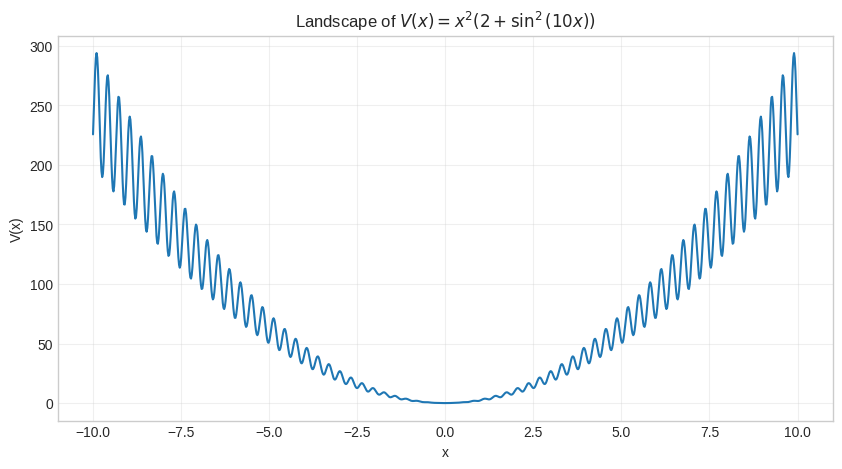

In [31]:

# 1. Define the Potential Function V(x)
def V(x):
    return (x**2) * (2 + (np.sin(10*x))**2)

# Visualize the potential to understand the difficulty
x_vis = np.linspace(-10, 10, 1000)
plt.figure(figsize=(10, 5))
plt.plot(x_vis, V(x_vis), label='V(x)')
plt.title(r"Landscape of $V(x) = x^2(2 + \sin^2(10x))$")
plt.xlabel("x")
plt.ylabel("V(x)")
plt.grid(True, alpha=0.3)
plt.show()


**Analysis:** We have many local "wiggles" (local minima) created by the sine term. A deterministic method starting at $x=5$ would get stuck in the nearest valley.





# 2. Simulated Annealing Algorithm

In [ ]:

def simulated_annealing(n_steps=5000, initial_x=None, sigma=1.0):
    # Initialize
    if initial_x is None:
        x = np.random.uniform(-10, 10)
    else:
        x = initial_x
        
    trajectory = np.zeros(n_steps)
    energy_history = np.zeros(n_steps)
    
    for n in range(1, n_steps + 1):
        # Current inverse temperature beta
        # Note: n starts at 1, log(1) = 0, so beta starts at 1
        beta = 1 + np.log(n)
        
        # Propose new position (Gaussian displacement)
        # x_new = x_old + noise
        x_prop = x + np.random.normal(0, sigma)
        
        # Calculate Energy Difference
        delta_V = V(x_prop) - V(x)
        
        # Metropolis Acceptance Criteria
        if delta_V < 0:
            # Improvement: Always accept
            x = x_prop
        else:
            # Worsening: Accept with probability e^(-beta * delta_V)
            prob = np.exp(-beta * delta_V)
            if np.random.rand() < prob:
                x = x_prop
        
        # Store stats
        trajectory[n-1] = x
        energy_history[n-1] = V(x)
        
    return trajectory, energy_history

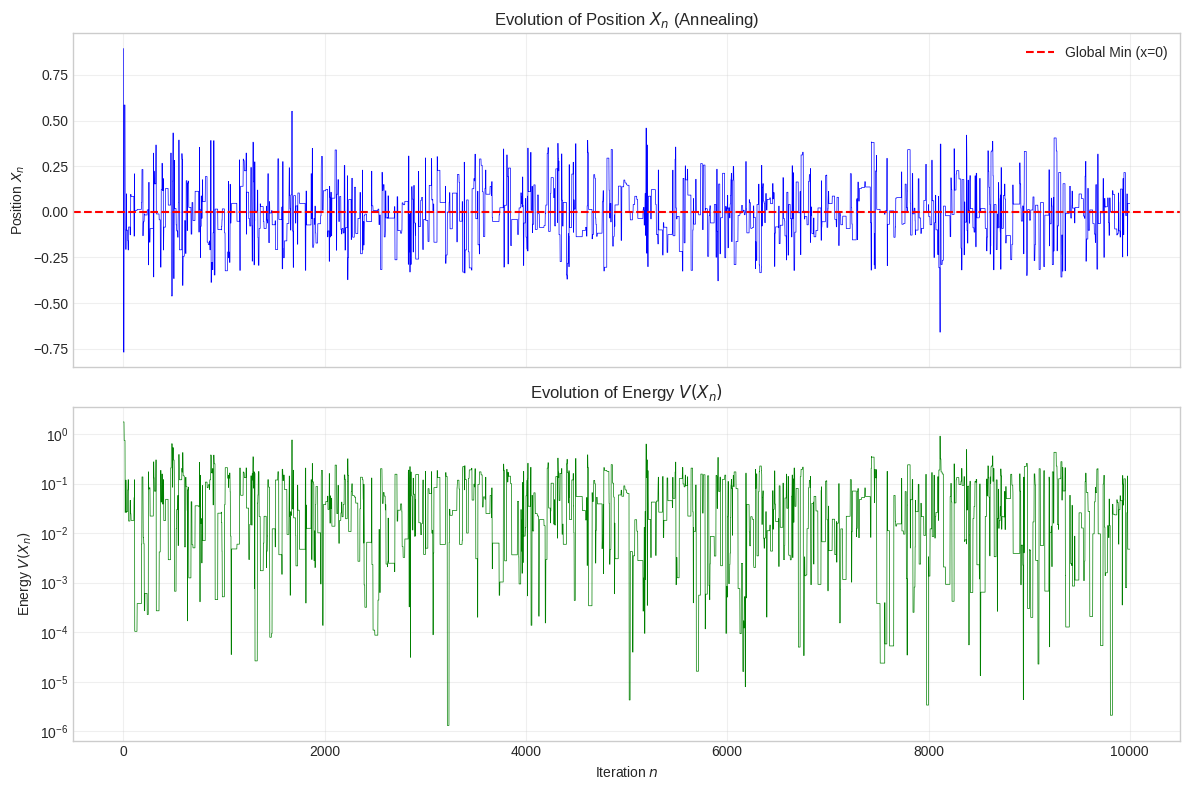

Final Position: x = 0.046469
Final Energy:   V(x) = 0.004752


In [33]:
n_steps = 10000
sigma_prop = 2.0 # Proposal step size

traj, energies = simulated_annealing(n_steps=n_steps, sigma=sigma_prop)


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)


ax1.plot(traj, lw=0.5, color='blue')
ax1.axhline(0, color='r', linestyle='--', label='Global Min (x=0)')
ax1.set_ylabel("Position $X_n$")
ax1.set_title("Evolution of Position $X_n$ (Annealing)")
ax1.legend()
ax1.grid(True, alpha=0.3)


ax2.plot(energies, lw=0.5, color='green')
ax2.set_ylabel("Energy $V(X_n)$")
ax2.set_xlabel("Iteration $n$")
ax2.set_title("Evolution of Energy $V(X_n)$")
ax2.set_yscale('log') # Log scale helps visualize convergence to 0
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Final Position: x = {traj[-1]:.6f}")
print(f"Final Energy:   V(x) = {energies[-1]:.6f}")




### **Analysis of Results**

1.  **Early iterations (Low $\beta$, High $T$):** The system has enough thermal energy to jump over the local barriers ($\sin^2(10x)$ bumps). The position fluctuates wildly.
2.  **Late iterations (High $\beta$, Low $T$):** As the temperature decreases ($1/\ln n$), the probability of accepting "uphill" moves decreases. The particle settles into the deepest valley it can find.
3.  **Convergence:** Given the quadratic envelope $x^2$, the valleys near zero are deeper than those far away. This guides the random walk towards the center. Eventually, it gets trapped in the central well at $x=0$, successfully finding the global minimum.

### **Q4. Graph Coloring**

We want to color a planar graph with $m=10$ nodes using 4 colors such that no two adjacent nodes share the same color.
*   **State Space:** Each state represents a specific coloring of the graph (a vector of size 10 with values in $\{1, 2, 3, 4\}$).
*   **Cost Function (Energy):** $H(c) = \text{Number of conflicts}$ (adjacent nodes with the same color). We want to minimize this to 0.
*   **Algorithm:** Simulated Annealing.

### **Explanation of the Logic:**
1.  **Initialization:** Start with a random assignment of colors. 
2.  **Perturbation (Neighbor function):** In discrete optimization, we define a "neighbor" as a state that is slightly different. Here, we simply pick **one node at random and change its color**. This is efficient and allows exploration.
3.  **Temperature:** We use a cooling schedule $T_n = \frac{10}{1 + 0.01n}$.
    *   High $T$: Accepts many bad moves (changing a color even if it creates more conflicts). This helps escape local minima (e.g., a state where changing any *single* node's color doesn't help, but changing *two* would).
    *   Low $T$: Behaves like a greedy algorithm ("hill climbing"), only accepting moves that reduce or maintain the number of conflicts.
4.  **Result:** The cost should drop to 0, meaning we found a valid 4-coloring of the planar graph (guaranteed to exist by the Four Color Theorem).

Adjacency Matrix Shape: (10, 10)
Initial Coloring: [1 2 1 2 3 1 1 2 3 1]


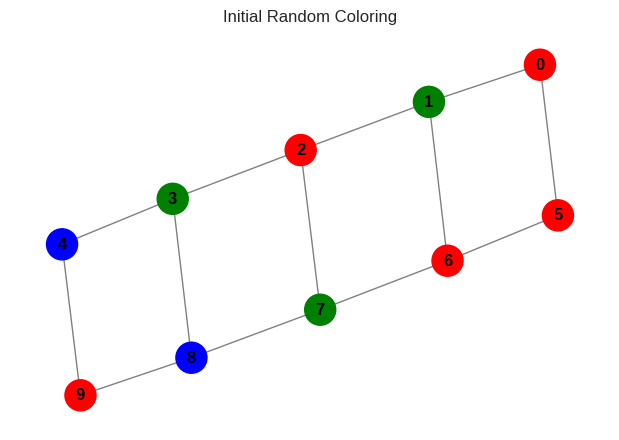

Initial Cost (Conflicts): 2


In [46]:
# (a) Create a Grid Graph (3x3 + 1 extra node to make 10 nodes, or 2x5)
# Let's use a 2x5 grid graph for simplicity (planar, 10 nodes)
m_nodes = 10
rows = 2
cols = 5
G = nx.grid_2d_graph(rows, cols)

# Relabel nodes to integers 0, 1, ..., 9 for easier indexing
mapping = {node: i for i, node in enumerate(G.nodes())}
G = nx.relabel_nodes(G, mapping)

# Get adjacency matrix
adj_matrix = nx.to_numpy_array(G)
print("Adjacency Matrix Shape:", adj_matrix.shape)

# (b) Generate Initial Random Coloring
# Colors represented by integers 1, 2, 3, 4
num_colors = 4
coloring = np.random.randint(1, num_colors + 1, size=m_nodes)
print("Initial Coloring:", coloring)

# Helper function to visualize the graph
def plot_graph(graph, colors, title="Graph Coloring"):
    color_map = []
    # Map integer 1-4 to actual matplotlib colors
    palette = {1: 'red', 2: 'green', 3: 'blue', 4: 'yellow'}
    
    for node in graph.nodes():
        color_idx = colors[node]
        color_map.append(palette[color_idx])
        
    pos = nx.spring_layout(graph, seed=42) # Consistent layout
    plt.figure(figsize=(6, 4))
    nx.draw(graph, pos, node_color=color_map, with_labels=True, 
            node_size=500, edge_color='gray', font_weight='bold')
    plt.title(title)
    plt.show()

plot_graph(G, coloring, title="Initial Random Coloring")

# (c) Define Cost Function
def calculate_cost(adj, colors):
    """
    Cost is the number of edges connecting nodes of same color.
    """
    cost = 0
    num_nodes = len(colors)
    # Iterate over all edges
    for i in range(num_nodes):
        for j in range(i + 1, num_nodes): # Check upper triangle
            if adj[i, j] == 1: # If edge exists
                if colors[i] == colors[j]:
                    cost += 1
    return cost

initial_cost = calculate_cost(adj_matrix, coloring)
print(f"Initial Cost (Conflicts): {initial_cost}")



In [47]:
# (d) Simulated Annealing for Graph Coloring
def solve_graph_coloring(graph_adj, n_nodes, n_steps=5000):
    # 1. Initialize
    current_colors = np.random.randint(1, 5, size=n_nodes)
    current_cost = calculate_cost(graph_adj, current_colors)
    
    best_colors = current_colors.copy()
    best_cost = current_cost
    
    cost_history = []
    
    # Annealing loop
    for n in range(1, n_steps + 1):
        # Temperature schedule (Exponential decay often works well for discrete)
        # T_n = T_0 / log(1+n) or T_0 * alpha^n
        T = 10.0 / (1 + 0.01 * n) 
        
        # 2. Propose Neighbor (Perturbation)
        # Pick one random node and change its color randomly
        node_to_change = random.randint(0, n_nodes - 1)
        new_color = random.randint(1, 4)
        
        # Create proposal
        new_colors = current_colors.copy()
        new_colors[node_to_change] = new_color
        
        # 3. Calculate Energy Change
        new_cost = calculate_cost(graph_adj, new_colors)
        delta_E = new_cost - current_cost
        
        # 4. Acceptance Criteria (Metropolis)
        if delta_E <= 0:
            # Accept improvement (or neutral)
            current_colors = new_colors
            current_cost = new_cost
            
            # Keep track of best solution found so far
            if new_cost < best_cost:
                best_cost = new_cost
                best_colors = new_colors.copy()
                
        else:
            # Accept worsening with probability
            prob = np.exp(-delta_E / T)
            if random.random() < prob:
                current_colors = new_colors
                current_cost = new_cost
        
        cost_history.append(current_cost)
        
        # Optional: Early stop if perfect solution found
        if best_cost == 0:
            print(f"Perfect coloring found at step {n}!")
            break
            
    return best_colors, best_cost, cost_history

# Run optimization
final_colors, final_cost, history = solve_graph_coloring(adj_matrix, m_nodes, n_steps=2000)
print(f"Final Cost: {final_cost}")
print(f"Final Coloring: {final_colors}")




Perfect coloring found at step 26!
Final Cost: 0
Final Coloring: [2 1 3 4 3 1 3 1 2 1]


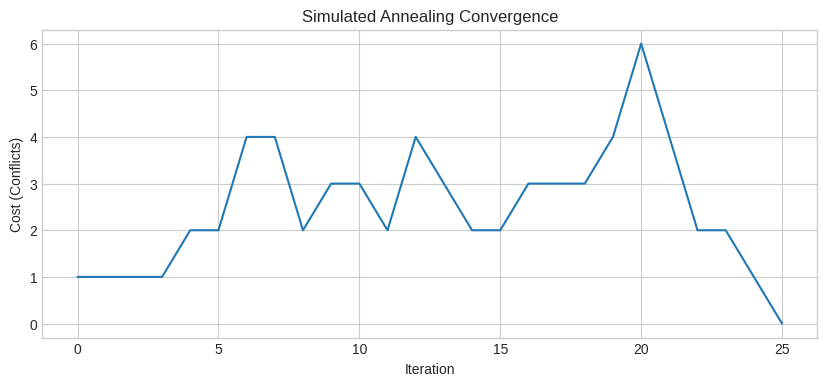

In [48]:
# Plot convergence
plt.figure(figsize=(10, 4))
plt.plot(history)
plt.xlabel("Iteration")
plt.ylabel("Cost (Conflicts)")
plt.title("Simulated Annealing Convergence")
plt.grid(True)
plt.show()

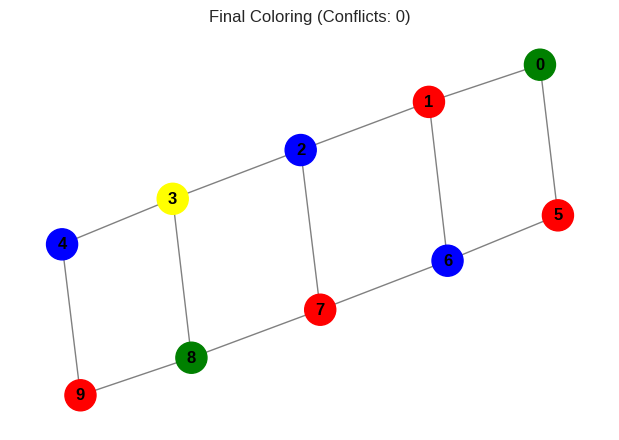

In [49]:
# Plot final graph
plot_graph(G, final_colors, title=f"Final Coloring (Conflicts: {final_cost})")
